In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import PIL
import scipy
import tensorflow as tf
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
loc = 'drive/MyDrive/Shtem2023/'

Mounted at /content/drive/


In [ ]:
os.listdir(loc + 'breastcancer')

['class0', 'class1']

In [ ]:
Xlist = []
for filename in os.listdir(loc+'breastcancer/class0'):
  img = PIL.Image.open(loc+'breastcancer/class0/'+filename)
  img2 = img.resize((300,300))
  arr = np.array(img2)
  Xlist.append(arr)
for filename in os.listdir(loc+'breastcancer/class1'):
  img = PIL.Image.open(loc+'breastcancer/class1/'+filename)
  img2 = img.resize((300,300))
  arr = np.array(img2)
  Xlist.append(arr)

In [ ]:
X = np.array(Xlist)
X.shape

(979, 300, 300, 3)

In [ ]:
xval = X[-120:]

In [ ]:
Ylist = []
numCat = 2
for filename in os.listdir(loc+'breastcancer/class0'):
  if 'class1' in filename:
    label = [1,0] #1 on the left means cancer positive
  else:
    label = [0,1]
  Ylist.append(label)
for filename in os.listdir(loc+'breastcancer/class1'):
  if 'class1' in filename:
    label = [1,0] #1 on the left means cancer positive
  else:
    label = [0,1]
  Ylist.append(label)

In [ ]:
Ylist
Y = np.array(Ylist)

print(Y.shape)
print(Y)

(979, 2)
[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


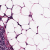

In [ ]:
PIL.Image.open(loc+'breastcancer/class1/'+'8863_idx5_x1801_y1201_class1.png')

In [ ]:
input_shape = X[0].shape
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=5,input_shape=input_shape, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=5, activation = 'relu'))
model.add(tf.keras.layers.Conv2D(
    10,
    4,
    activation='relu'
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=2,
    padding='valid',
    data_format=None))
model.add(tf.keras.layers.Conv2D(
    10,
    4,
    activation='relu'
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=2,
    padding='valid',
    data_format=None))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=5, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=numCat, activation = 'softmax'))

"""tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None
)"""
"""tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None
)"""
"""tf.keras.layers.BatchNormalization(
)"""
"""tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)"""
# after you create your model it's
# always a good habit to print out it's summary
model.summary()
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              # MAE error is good for
              # numerical predictions
              loss=tf.keras.losses.CategoricalCrossentropy(), metrics = tf.keras.metrics.CategoricalAccuracy(
    name='categorical_accuracy', dtype=None
))
losses = model.fit(X, Y,
                  # it will use 'batch_size' number
                  # of examples per example
                  batch_size=256,
                  epochs=3,  # total epoch
                  )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300, 300, 5)       20        
                                                                 
 dense_1 (Dense)             (None, 300, 300, 5)       30        
                                                                 
 conv2d (Conv2D)             (None, 297, 297, 10)      810       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 145, 145, 10)      1610      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 10)       0         
 2D)                                                    

In [ ]:
losses.history

{'loss': [21.04829978942871, 2.316962480545044, 1.183035135269165],
 'categorical_accuracy': [0.5056179761886597,
  0.7977527976036072,
  0.7671092748641968]}

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.15, shuffle= True)

In [ ]:
 for n in np.arange(100, 900, 50):
  x_train, x_valid, y_train, y_valid = train_test_split(X[:n], Y[:n], test_size=0.15, shuffle= True)
  input_shape = X[0].shape
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=5,input_shape=input_shape, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=5, activation = 'relu'))
  model.add(tf.keras.layers.Conv2D(
      10,
      4,
      activation='relu'
  ))
  model.add(tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=2,
      padding='valid',
      data_format=None))
  model.add(tf.keras.layers.Conv2D(
      10,
      4,
      activation='relu'
  ))
  model.add(tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=2,
      padding='valid',
      data_format=None))
  model.add(tf.keras.layers.Conv2D(
      10,
      4,
      activation='relu'
  ))
  model.add(tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=2,
      padding='valid',
      data_format=None))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(units=5, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=numCat, activation = 'softmax'))

  """tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=None,
      padding='valid',
      data_format=None
  )"""
  """tf.keras.layers.Conv2D(
      filters,
      kernel_size,
      strides=(1, 1),
      padding='valid',
      data_format=None,
      dilation_rate=(1, 1),
      groups=1,
      activation=None
  )"""
  """tf.keras.layers.BatchNormalization(
  )"""
  """tf.keras.layers.Dropout(
      rate, noise_shape=None, seed=None, **kwargs
  )"""
  # after you create your model it's
  # always a good habit to print out it's summary
  model.summary()
  # adam optimizer works pretty well for
  # all kinds of problems and is a good starting point
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                # MAE error is good for
                # numerical predictions
                loss=tf.keras.losses.CategoricalCrossentropy(), metrics = tf.keras.metrics.CategoricalAccuracy(
      name='categorical_accuracy', dtype=None
  ))
  losses = model.fit(x_train, y_train,
                    # it will use 'batch_size' number
                    # of examples per example
                    batch_size=256,
                    epochs=3,  # total epoch
                    validation_data = (x_valid, y_valid)
                    )
  df = pd.DataFrame(losses.history)
  df.to_csv(loc + 'Saniya' + str(n) + '.csv')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300, 300, 5)       20        
                                                                 
 dense_5 (Dense)             (None, 300, 300, 5)       30        
                                                                 
 conv2d_2 (Conv2D)           (None, 297, 297, 10)      810       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 148, 148, 10)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 145, 145, 10)      1610      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 72, 72, 10)       0         
 2D)                                                  

1/1 [==============================] - 30s 30s/step - loss: 0.5087 - categorical_accuracy: 0.6745 - val_loss: 8.3158 - val_categorical_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 35s 35s/step - loss: 0.3670 - categorical_accuracy: 0.7783 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 33s 33s/step - loss: 0.0310 - categorical_accuracy: 0.9906 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 300, 300, 5)       20        
                                                                 
 dense_21 (Dense)            (None, 300, 300, 5)       30        
                                                                 
 conv2d_14 (Conv2D)          (None, 297, 297, 10)      810       
                            

1/1 [==============================] - ETA: 0s - loss: 0.6449 - categorical_accuracy: 0.6275

1/1 [==============================] - 37s 37s/step - loss: 0.6449 - categorical_accuracy: 0.6275 - val_loss: 206.3121 - val_categorical_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 31s 31s/step - loss: 0.6948 - categorical_accuracy: 0.6706 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 32s 32s/step - loss: 3.7664 - categorical_accuracy: 0.7098 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 300, 300, 5)       20        
                                                                 
 dense_25 (Dense)            (None, 300, 300, 5)       30        
                                                                 
 conv2d_17 (Conv2D)          (None, 297, 297, 10)      810       
                          

2/2 [==============================] - 41s 8s/step - loss: 0.5628 - categorical_accuracy: 0.6667 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 42s 9s/step - loss: 0.4983 - categorical_accuracy: 0.9360 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/3
2/2 [==============================] - 37s 7s/step - loss: 0.0037 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 300, 300, 5)       20        
                                                                 
 dense_29 (Dense)            (None, 300, 300, 5)       30        
                                                                 
 conv2d_20 (Conv2D)          (None, 297, 297, 10)      810       
                               

In [ ]:
##model below is with a test_size of 0.25 and 15 epochs (Saniya_V2_)

In [ ]:
 for n in np.arange(100, 900, 50):
  x_train, x_valid, y_train, y_valid = train_test_split(X[:n], Y[:n], test_size=0.25, shuffle= True)
  input_shape = X[0].shape
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=5,input_shape=input_shape, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=5, activation = 'relu'))
  model.add(tf.keras.layers.Conv2D(
      10,
      4,
      activation='relu'
  ))
  model.add(tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=2,
      padding='valid',
      data_format=None))
  model.add(tf.keras.layers.Conv2D(
      10,
      4,
      activation='relu'
  ))
  model.add(tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=2,
      padding='valid',
      data_format=None))
  model.add(tf.keras.layers.Conv2D(
      10,
      4,
      activation='relu'
  ))
  model.add(tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=2,
      padding='valid',
      data_format=None))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(units=5, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units=numCat, activation = 'softmax'))

  """tf.keras.layers.MaxPooling2D(
      pool_size=(2, 2),
      strides=None,
      padding='valid',
      data_format=None
  )"""
  """tf.keras.layers.Conv2D(
      filters,
      kernel_size,
      strides=(1, 1),
      padding='valid',
      data_format=None,
      dilation_rate=(1, 1),
      groups=1,
      activation=None
  )"""
  """tf.keras.layers.BatchNormalization(
  )"""
  """tf.keras.layers.Dropout(
      rate, noise_shape=None, seed=None, **kwargs
  )"""
  # after you create your model it's
  # always a good habit to print out it's summary
  model.summary()
  # adam optimizer works pretty well for
  # all kinds of problems and is a good starting point
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                # MAE error is good for
                # numerical predictions
                loss=tf.keras.losses.CategoricalCrossentropy(), metrics = tf.keras.metrics.CategoricalAccuracy(
      name='categorical_accuracy', dtype=None
  ))
  losses = model.fit(x_train, y_train,
                    # it will use 'batch_size' number
                    # of examples per example
                    batch_size=256,
                    epochs=15,  # total epoch
                    validation_data = (x_valid, y_valid)
                    )
  df = pd.DataFrame(losses.history)
  df.to_csv(loc + 'Saniya_V2_' + str(n) + '.csv')


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 300, 300, 5)       20        
                                                                 
 dense_69 (Dense)            (None, 300, 300, 5)       30        
                                                                 
 conv2d_50 (Conv2D)          (None, 297, 297, 10)      810       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 148, 148, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 145, 145, 10)      1610      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 72, 72, 10)       0         
 g2D)                                                